# Propagation of quantum noise in nonlinear systems

## Overview of code

This notebook contains routines to propagate pulses of light through compound systems involving one or more beamsplitters and Kerr nonlinear media. Future additions will also allow for propagation through amplifying media and resonant structures.

### Parameterization of quantum fields

For the type of macroscopic pulses of light we consider, it is accurate to linearize the Heisenberg equations of motion about the mean-field solution and to solve for these functions at linear order (it is equivalent to taking the quartic Kerr Hamiltonian and retaining only quadratic terms). 

For any system we consider, the relevant mean-fields can be expressed as $\alpha_{\sigma}(z,t)$, where $\sigma$ is a channel index, $z$ is the pulse coordinate, and $t$ is time. Since we will treat each $z$-position as a separate and approximately discrete degree of freedom, we will write $\alpha_{i\sigma}(t)$. Similarly, for the operator-valued fluctuations, we may express the set of fluctuation operators as:
\begin{equation}
(\delta a_1(\xi_1) \cdots \delta a_1(\xi_{N_z}),\delta a_1^{\dagger}(\xi_1) \cdots \delta a_1^{\dagger}(\xi_{N_z}),\cdots,\delta a_{N_m}(\xi_1) \cdots \delta a_{N_m}(\xi_{N_z}),\delta a_{N_m}^{\dagger}(\xi_1) \cdots \delta a_{N_m}^{\dagger}(\xi_{N_z}))^T,
\end{equation}
where $N_z$ denotes the number of spatial points, taken to be the same for each channel, while $N_m$ denotes the number of channels (each time a beamsplitter is introduced, the channel number grows by 1). The number of degrees of freedom is $2N_zN_m$. 

The general form of any operator after nonlinear transformations, within the linearized framework is,
\begin{equation}
\delta a_{i\sigma}^{\text{out}} = \sum\limits_{j\sigma'} \mu_{i\sigma,j\sigma'}\delta a^{\text{in}}_{j\sigma'} + \nu_{i\sigma,j\sigma'}\delta a^{\dagger\text{in}}_{j\sigma'}.
\end{equation}
Note that, for the commutator to be preserved, one requires:
\begin{equation}
\delta_{ij}\delta_{\sigma\sigma'}= (\mu\mu^{\dagger}-\nu\nu^{\dagger})_{i\sigma,j\sigma'}.
\end{equation}

Therefore, our fields are parameterized by $\alpha_{i\sigma},\mu_{i\sigma,j\sigma'},\nu_{i\sigma,j\sigma'},$ and the aim of the code will be to propagate these quantities through various elements (you can think of this as a nonlinear transfer matrix approach.)

Our data matrix will be of the form (denoting the channels by numbers):
\begin{equation}
M = \begin{pmatrix}
\mu_{i1,j1} & \nu_{i1,j1} & \mu_{i1,j2} & \nu_{i1,j2} & \cdots & \mu_{i1,jN_{\sigma}} &\nu_{i1,jN_{\sigma}} \\
\mu_{i2,j1} & \nu_{i2,j1} & \mu_{i2,j2} & \nu_{i2,j2} & \cdots & \mu_{i2,jN_{\sigma}} &\nu_{i2,jN_{\sigma}} \\
\vdots & \vdots & \vdots & \vdots & \cdots & \vdots & \vdots \\
\mu_{iN_{\sigma},j1} & \nu_{iN_{\sigma},j1} & \mu_{iN_{\sigma},j2} & \nu_{iN_{\sigma},j2} & \cdots & \mu_{iN_{\sigma},jN_{\sigma}} &\nu_{iN_{\sigma},jN_{\sigma}},
\end{pmatrix}
\end{equation}
where the $i,j$ indices denote blocks arranged by spatial position.

### Expression of operators

We will ultimately be interested in the photon numbers and fluctuations of the different channels. The pulse photon number operator is given by (in discretized notation $a_{i\sigma} = a_{\sigma}(\xi_i)$).
\begin{equation}
n_\sigma = \sum_i a^{\dagger}_{i\sigma}a_{i\sigma } \approx \sum\limits_i \alpha_{i\sigma }^*\delta a_{i\sigma } + \alpha_{i\sigma }\delta a^{\dagger}_{i\sigma}.
\end{equation}

Expectation values of functions such as $n^2$ entail expectation values of operator products in the vacuum state, such as
\begin{align}
\langle a_{i\sigma}a_{j\sigma'}\rangle &= \sum\limits_{k\sigma''} \mu_{i\sigma,k\sigma''}\nu_{j\sigma',k\sigma''} = (\mu\nu^{\dagger})_{i\sigma,j\sigma'}\\
\langle a_{i\sigma}a^{\dagger}_{j\sigma'}\rangle &= \sum\limits_{k\sigma''} \mu_{i\sigma,k\sigma''}\mu^*_{j\sigma',k\sigma''} = (\mu\mu^{\dagger})_{i\sigma,j\sigma'} \\
\langle a^{\dagger}_{i\sigma}a_{j\sigma'}\rangle &= \sum\limits_{k\sigma''} \nu^*_{i\sigma,k\sigma''}\nu_{j\sigma',k\sigma''} = (\nu^*\nu^{T})_{i\sigma,j\sigma'} \\
\langle a^{\dagger}_{i\sigma}a^{\dagger}_{j\sigma'}\rangle &= \sum\limits_{k\sigma''} \nu^*_{i\sigma,k\sigma''}\mu^*_{j\sigma',k\sigma''} = (\nu^*\mu^{T})_{i\sigma,j\sigma'}.
\end{align}

Thus, by getting the matrices of $\mu$ and $\nu$, we can calculate any quadratic products, which is precisely what we are after.


### Transformation rules

#### Broadband beamsplitter

For a broadband beamsplitter coupling two-modes $\alpha,\beta$, the mean fields transform as:
\begin{align}
\alpha_i &\rightarrow -r\alpha_i + it\beta_i \\
\beta_i &\rightarrow it\alpha_i - r\beta_i,
\end{align}
while the $\mu,\nu$ transform as:
\begin{align}
\mu_{i\alpha,j\sigma} &\rightarrow -r\mu_{i\alpha,j\sigma} + it\mu_{i\beta,j\sigma} \\
\mu_{i\beta,j\sigma} &\rightarrow it\mu_{i\alpha,j\sigma} - r\mu_{i\beta,j\sigma} \\
\nu_{i\alpha,j\sigma} &\rightarrow -r\nu_{i\alpha,j\sigma} + it\nu_{i\beta,j\sigma}\\
\nu_{i\beta,j\sigma} &\rightarrow it\nu_{i\alpha,j\sigma} - r\nu_{i\beta,j\sigma}
\end{align}

#### Kerr nonlinear fiber

The mean fields propagate according to the nonlinear Schrodinger equation:
\begin{equation}
\frac{\partial}{\partial t}\alpha_i(t) = \frac{iC}{2}D^2\alpha_i(t) + iK|\alpha_i(t)|^2\alpha_i(t).
\end{equation}

Let us now discuss units and normalizations. We wish to normalize $\alpha_i$ such that $|\alpha_i|^2$ represents the number of photons in the spatial size of width $\delta z$, where $\delta z$ is the elementary unit of length (could be $\lambda$ for example for a sufficiently long pulse). Working in terms of these discretized operators renormalizes $K \rightarrow K/\Delta z$. The dimensions of the various coefficients are
\begin{equation}
[C] = L^2T^{-1}, [K] = T^{-1}, [\alpha] = 1.
\end{equation}
Taking this into account, typical values of the relevant constants are

1. $C = 22 \times 10^3 \text{fs}^2\text{m}^{-1} \times v_g^3$ (using Thorlabs dispersion data for the PM-1550XP). Note that the sign should be positive, given the relationship $d^2k/d\omega^2 = -v_g^{-3}d^2\omega/d\beta^2$. The typical value for fibers at 1550 nm (https://www.rp-photonics.com/group_velocity_dispersion.html) is negative, which makes $C$ positive.

2. $K = \hbar\omega\gamma v_g^2 / \Delta z$, where $\gamma$ is the usual nonlinear fiber coefficient in units of $[\text{power}\times\text{length}]^{-1}$ and $\Delta z$ is the discretization length for the pulse (to convert photon density into photon number per discrete spatial point). 

3. Typical values of $\alpha$ per cell are on the order of (for a 100 pJ pulse at 1550 nm) $8.3\times10^8/N_{\text{z}}$, where $N_z$ is the number of spatial slices in the pulse (this is loosely defined, and not that important: it is just meant to be a sanity check).

4. The time step is some fraction of the overall propagation time, $L_{\text{fiber}}/v_g$.

Split step: the symmetric split-step is:
- $a_i \rightarrow iK|a_i|^2a_i \Delta t/2$
- $a_i \rightarrow \text{FT}^{-1}[e^{-iCk^2/2 \Delta t}\text{FT}[a_i]]$
- $a_i \rightarrow iK|a_i|^2a_i \Delta t/2$.

The symmetric step can also be done by fourier transforming twice.

The fluctuations propagate under the rule:
A nonlinear fiber with only Kerr nonlinearity and second-order dispersion transforms the $\mu$ and $\nu$ in the following way:

\begin{equation}
\partial_t \mu_{i\sigma,j\sigma'}(t) = \frac{iC}{2}D^2\mu_{i\sigma,j\sigma'}(t)+2iK|\alpha_i(t)|^2\mu_{i\sigma,j\sigma'}(t) + iK\alpha_i^2(t)\nu^*_{i\sigma,j\sigma'}(t) \\ 
\partial_t \nu_{i\sigma,j\sigma'}(t) = \frac{iC}{2}D^2\nu_{i\sigma,j\sigma'}(t)+2iK|\alpha_i(t)|^2\nu_{i\sigma,j\sigma'}(t) + iK\alpha_i^2(t)\mu^*_{i\sigma,j\sigma'}(t),
\end{equation}
where $D$ is the discretized derivative operator.

This will also be solved by split-step. First we FT and then we update according to the remaining terms (we use a second-order update.)

#### Spectral filter

A frequency-dependent filter effectively couples different spatial slots, as:

\begin{align}
\mu_{i\alpha,j\sigma} &\rightarrow \sum\limits_{j}S_{11,ik}\mu_{k\alpha,j\sigma} + S_{12,ik}\mu_{k\beta,j\sigma} \\
\mu_{i\beta,j\sigma} &\rightarrow \sum\limits_{j}S_{21,ik} \mu_{k\alpha,j\sigma} + S_{22,ik}\mu_{k\beta,j\sigma} \\
\nu_{i\alpha,j\sigma} &\rightarrow \sum\limits_{j}S_{11,ik}\nu_{k\alpha,j\sigma} + S_{12,ik}\nu_{k\beta,j\sigma}\\
\nu_{i\beta,j\sigma} &\rightarrow \sum\limits_{j}S_{21,ik} \nu_{k\alpha,j\sigma} + S_{22,ik}\nu_{k\beta,j\sigma}
\end{align}

In [1]:
using LinearAlgebra
using QuantumOptics
using SparseArrays
using Arpack
using PyPlot
using Distributions
using Statistics
using DelimitedFiles
using ForwardDiff
using QuadGK
using Roots
using Interpolations
using DifferentialEquations
using FFTW
using CSV

In [2]:
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 12;
rcParams["font.sans-serif"] = "Arial";
rcParams["figure.figsize"] = (2,2);

In [3]:
# Fundamental constants
ħ = 1.05e-34;
c_light = 3e8;
ϵ0 = 8.85e-12;

#### Functions

Classes

In [4]:
mutable struct beamsplitter
    modes; 
    t::Float64;
end

mutable struct fiber
    fiber_mode::Int64;
    fiber_index::Float64; 
    fiber_length::Float64;
    fiber_dispersion::Float64;
    fiber_nonlinearity::Float64;
end

mutable struct sim
    num_modes::Int64
    N_z::Int64
    z_grid #k_grid is derived from z-grid
end

mutable struct state
    mean_fields
    V_matrix ## the V matrix
end

Auxiliary functions

In [5]:
function fftfreq(n,fs)
    if mod(n,2) == 0
        freq = [0:n÷2-1; -n÷2:-1]  * fs/n; # if n is even
        else 
        freq = [0:(n-1)÷2; -(n-1)÷2:-1]  * fs/n  # if n is odd
    end

    return 2*pi*freq
end

function get_row_index(i,σ)
    index = (σ-1)*N_z + i;
    return index
end

function get_column_index(i,σ)
    index = (σ-1)*2*N_z + i;
    return index
end

function get_ranges(mode_indices)
    m_i = mode_indices[1];
    m_j = mode_indices[2];
    index_i_init = (m_i - 1)*N_z + 1;
    index_i_final = (m_i)*N_z;
    index_j_init = 2*(m_j - 1)*N_z + 1;
    index_j_final = 2*(m_j)*N_z;
    ranges = index_i_init:index_i_final,index_j_init:index_j_final
    return ranges
end

function get_submatrix(mode_indices,V)
    m_i = mode_indices[1];
    m_j = mode_indices[2];
    index_i_init = (m_i - 1)*N_z + 1;
    index_i_final = (m_i)*N_z;
    index_j_init = 2*(m_j - 1)*N_z + 1;
    index_j_final = 2*(m_j)*N_z;
    M = V[index_i_init:index_i_final,index_j_init:index_j_final];
    return M
end

function get_μνmatrix(V,sim)
    N_z = sim.N_z;
    N_σ = sim.num_modes
    μ_mat = 1.0im*zeros(N_z*N_σ,N_z*N_σ);
    ν_mat = 1.0im*zeros(N_z*N_σ,N_z*N_σ);
    for ii=1:N_z
        for jj=1:N_z
            for ss = 1:N_σ
                for rr = 1:N_σ
                    μ_mat[N_z*(ss-1)+ii,N_z*(rr-1)+jj] = V[N_z*(ss-1)+ii,2*N_z*(rr-1)+jj];
                    ν_mat[N_z*(ss-1)+ii,N_z*(rr-1)+jj] = V[N_z*(ss-1)+ii,2*N_z*(rr-1)+jj+N_z]
                end
            end
        end
    end
    return μ_mat,ν_mat
end


function check_commutator(state,sim)
    V = state.V_matrix;
    μ,ν = get_μνmatrix(V,sim);
    val = norm(μ*adjoint(μ) - ν*adjoint(ν) - UniformScaling(1.0));
    return val
end


function vacuum_V(sim)
    N_σ = sim.num_modes;
    N_z = sim.N_z;
    
    V_matrix = 1.0im*zeros(N_z*N_σ,2*N_z*N_σ);

    for ii = 1:N_z
        for ss = 1:N_σ
            M_matrix = get_submatrix([ss,ss],V_matrix)
            M_matrix[ii,ii] = 1.0+0.0*im;
            V_matrix[get_ranges([ss,ss])[1],get_ranges([ss,ss])[2]] .= M_matrix;
        end
    end

    V_init = copy(V_matrix);
    
    return V_init
end

function n2_exp(state,mode,sim)
    
    α = get_meanfield_i(state,mode)
    V = state.V_matrix;
    μ,ν = get_μνmatrix(V,sim)
    N_z = sim.N_z;
    
    term1 = transpose(conj.(α))*(μ*transpose(ν))[1:N_z,1:N_z]*(conj.(α));
    term2 = transpose(conj.(α))*(μ*adjoint(μ))[1:N_z,1:N_z]*(α);
    term3 = transpose(α)*(conj.(ν)*transpose(ν))[1:N_z,1:N_z]*conj.(α);
    term4 = transpose(α)*(conj.(ν)*adjoint(μ))[1:N_z,1:N_z]*α;
    
    n2 = term1 + term2 + term3 + term4;
    return n2
end

n2_exp (generic function with 1 method)

Mean-field functions

In [6]:
function BS_meanfield(state,sim,BS)
    t = BS.t;
    r = sqrt(1-t^2);
    N_z = sim.N_z;
    modes = BS.modes;
    range_α = get_row_index(1,modes[1]):get_row_index(N_z,modes[1])
    range_β = get_row_index(1,modes[2]):get_row_index(N_z,modes[2])
    α = state.mean_fields[range_α];
    β = state.mean_fields[range_β];
    α_prime = -r*α + 1im*t*β;
    β_prime = 1im*t*α - r*β;
    state.mean_fields[range_α] .= α_prime;
    state.mean_fields[range_β] .= β_prime;
end

function split_step_prop_singlestep(α,sim,fiber,dt,method)
    # note that k_grid was already centered with fftshift
    
    z_grid = sim.z_grid;
    Δz = z_grid[2] - z_grid[1];
    K_fiber = fiber.fiber_nonlinearity / Δz;
    fiber_dispersion = fiber.fiber_dispersion;
    k_grid = fftfreq(sim.N_z,1/Δz)
    
    if method == "nd"
        α += 1im*K_fiber*(abs2.(α)).*α*dt;
        α = ifft(exp.(-1im/2*fiber_dispersion*(k_grid).^2*(dt)).*fft(α));
    elseif method == "dn"
        α = ifft(exp.(-1im/2*fiber_dispersion*(k_grid).^2*(dt)).*fft(α));
        α += 1im*K_fiber*(abs2.(α)).*α*dt;
    elseif method == "dnd"
        α = ifft(exp.(-1im/2*fiber_dispersion*(k_grid).^2*(dt/2)).*fft(α));
        α = exp.(1im*K_fiber*(abs2.(α))*dt).*α;
        α = ifft(exp.(-1im/2*fiber_dispersion*(k_grid).^2*(dt/2)).*fft(α));
    elseif method == "ndn"
        α = exp.(1im*K_fiber*(abs2.(α))*dt/2).*α;
        α = ifft(exp.(-1im/2*fiber_dispersion*(k_grid).^2*(dt)).*fft(α));
        α = exp.(1im*K_fiber*(abs2.(α))*dt/2).*α;
    end

end

function split_step_prop(α_init,sim,fiber,t_grid,method)
    
    z_grid = sim.z_grid;
    Δz = z_grid[2] - z_grid[1];
    K_fiber = fiber.fiber_nonlinearity / Δz;
    fiber_dispersion = fiber.fiber_dispersion;
    k_grid = fftfreq(sim.N_z,1/Δz)
    N_steps = length(t_grid);
    dt = t_grid[2] - t_grid[1];
    
    α_zt = 1.0im*zeros(N_steps,N_z);
    α = copy(α_init);
    for ii=1:N_steps
        α = split_step_prop_singlestep(α,sim,fiber,dt,method)
        α_zt[ii,:] = α;
    end
    return α_zt;
end 

function fiber_meanfield(state,sim,fiber,t_grid)
    mode = fiber.fiber_mode;
    range_α = get_row_index(1,mode):get_row_index(N_z,mode)
    α_init = state.mean_fields[range_α];
    α_prime = split_step_prop(α_init,sim,fiber,t_grid,"ndn")
    state.mean_fields[range_α] .= α_prime[end,:];
    return α_prime;
end

fiber_meanfield (generic function with 1 method)

In [7]:
function BS_transform_broadband(V,t,modes,N_z,N_σ)
    V_prime = copy(V);
    α = modes[1];
    β = modes[2];
    V_cp = copy(V);
    r = sqrt(1-t^2);
    for ii=1:N_z
        for jj=1:N_z
            for ss=1:N_σ
                μ_iαjσ = V_cp[N_z*(α-1)+ii,2*N_z*(ss-1)+jj];
                μ_iβjσ = V_cp[N_z*(β-1)+ii,2*N_z*(ss-1)+jj];
                ν_iαjσ = V_cp[N_z*(α-1)+ii,2*N_z*(ss-1)+jj+N_z];
                ν_iβjσ = V_cp[N_z*(β-1)+ii,2*N_z*(ss-1)+jj+N_z];
                
                V_prime[N_z*(α-1)+ii,2*N_z*(ss-1)+jj] = -r*μ_iαjσ + 1im*t*μ_iβjσ;
                V_prime[N_z*(β-1)+ii,2*N_z*(ss-1)+jj] = 1im*t*μ_iαjσ - r*μ_iβjσ;
                V_prime[N_z*(α-1)+ii,2*N_z*(ss-1)+jj+N_z] = -r*ν_iαjσ + 1im*t*ν_iβjσ;
                V_prime[N_z*(β-1)+ii,2*N_z*(ss-1)+jj+N_z] = 1im*t*ν_iαjσ - r*ν_iβjσ;
            end
        end
    end
    return V_prime
end

function BS_fluctuations(state,sim,BS)
    t = BS.t;
    r = sqrt(1-t^2);
    N_z = sim.N_z;
    BS_modes = BS.modes;
    N_σ = sim.num_modes;
    V = copy(state.V_matrix);
    V = BS_transform_broadband(V,t,BS_modes,N_z,N_σ)
    state.V_matrix = V;
end


function propagate_fluctuations_single_step(V_init,α_zt_fn,sim,fiber,t,dt)
    # V_init is a 2N-dimensional vector and needs to be specified for each j,σ,σ'. For initial coherent states
    # μ,ν are basis vectors (single 1).
    
    z_grid = sim.z_grid;
    Δz = z_grid[2] - z_grid[1];
    K_fiber = fiber.fiber_nonlinearity / Δz;
    fiber_dispersion = fiber.fiber_dispersion;
    k_grid = fftfreq(sim.N_z,1/Δz)
    
    # upgraded to second-order midpoint method;
    μ_tmp = V_init[1:N_z];
    ν_tmp = V_init[N_z+1:2*N_z];
    
    μ_tmp = ifft(exp.(-1im/2*fiber_dispersion*(k_grid).^2*(dt)).*fft(μ_tmp));
    ν_tmp = ifft(exp.(-1im/2*fiber_dispersion*(k_grid).^2*(dt)).*fft(ν_tmp));
    
    # half-step advance for first-part of midpoint method
    α_zt = α_zt_fn.(t,z_grid);
    μ_tmp_half = μ_tmp + (2im*K_fiber*abs2.(α_zt).*μ_tmp + 1im*K_fiber*((α_zt).^2).*(conj.(ν_tmp)))*(dt/2);
    ν_tmp_half = ν_tmp + (2im*K_fiber*abs2.(α_zt).*ν_tmp + 1im*K_fiber*((α_zt).^2).*(conj.(μ_tmp)))*(dt/2);
    
    # second part of midpoint
    α_zt = α_zt_fn.(t+dt/2,z_grid);
    μ_tmp = μ_tmp + (2im*K_fiber*abs2.(α_zt).*μ_tmp_half + 1im*K_fiber*((α_zt).^2).*(conj.(ν_tmp_half)))*(dt);
    ν_tmp = ν_tmp + (2im*K_fiber*abs2.(α_zt).*ν_tmp_half + 1im*K_fiber*((α_zt).^2).*(conj.(μ_tmp_half)))*(dt);

    # symmetrizing FT-SQZ-FT didn't appear to be too important here
    μ = μ_tmp;
    ν = ν_tmp;
    V = [μ; ν]
    return V
end

function fluctuation_prop(V_init,α_zt_fn,sim,fiber,t_grid)
    dt = t_grid[2] - t_grid[1]; 
    V = V_init;
    for tt in t_grid
        V = propagate_fluctuations_single_step(V,α_zt_fn,sim,fiber,tt,dt)
    end
    return V
end 

function fiber_fluctuations(state,sim,fiber,t_grid,α_fn)
    
    mode = fiber.fiber_mode;
    V_initial = copy(state.V_matrix);
    N_z = sim.N_z;
    N_σ = sim.num_modes;
    
    for ss=1:N_σ
        V_sub = get_submatrix([mode,ss],V_initial)
        V_sub_tmp = copy(V_sub);
        for ii=1:N_z
            U_init = [V_sub_tmp[:,ii]; V_sub_tmp[:,ii+N_z]];
            U_tmp = fluctuation_prop(U_init,α_fn,sim,fiber,t_grid[1:end-1]);
            V_sub_tmp[:,ii] = U_tmp[1:N_z];
            V_sub_tmp[:,ii+N_z] = U_tmp[N_z+1:2*N_z];
        end
        state.V_matrix[get_ranges([mode,ss])[1],get_ranges([mode,ss])[2]] .= V_sub_tmp;
    end 
end

function get_meanfield_i(state,mode)
    range_mode = get_row_index(1,mode):get_row_index(N_z,mode);
    field = state.mean_fields[range_mode];
    return field
end


function BS_transform_spectral(V,S,modes)
    
    V_prime = copy(V);
    α = modes[1];
    β = modes[2];
    V_cp = copy(V);
    
    for ii=1:N_z
        for jj=1:N_z
            for ss=1:N_σ
                for kk=1:N_z
                    
                    S11 = S(ii,kk)[1,1];
                    S12 = S(ii,kk)[1,2];
                    S21 = S(ii,kk)[2,1];
                    S22 = S(ii,kk)[2,2];
                    
                    μ_kαjσ = V_cp[N_z*(α-1)+kk,2*N_z*(ss-1)+jj];
                    μ_kβjσ = V_cp[N_z*(β-1)+kk,2*N_z*(ss-1)+jj];
                    ν_kαjσ = V_cp[N_z*(α-1)+kk,2*N_z*(ss-1)+jj+N_z];
                    ν_kβjσ = V_cp[N_z*(β-1)+kk,2*N_z*(ss-1)+jj+N_z];
                
                    V_prime[N_z*(α-1)+ii,2*N_z*(ss-1)+jj] += S11*μ_kαjσ + S12*μ_kβjσ;
                    V_prime[N_z*(β-1)+ii,2*N_z*(ss-1)+jj] += S21*μ_kαjσ + S22*μ_kβjσ;
                    V_prime[N_z*(α-1)+ii,2*N_z*(ss-1)+jj+N_z] += S11*ν_kαjσ + S12*ν_kβjσ;
                    V_prime[N_z*(β-1)+ii,2*N_z*(ss-1)+jj+N_z] += S21*ν_kαjσ + S22*ν_kβjσ;
                end
            end
        end
    end
    
    return V_prime
end

BS_transform_spectral (generic function with 1 method)

Run functions

In [8]:
function prop_system_mean(components,state,sim,t_grid)
    
    z_grid = sim.z_grid
    
    for ii=1:length(components)
        component = components[ii];
        if typeof(component) == beamsplitter
            BS_meanfield(state,sim,component);
        elseif typeof(component) == fiber
            α_zt = fiber_meanfield(state,sim,component,t_grid);
        end
    end

end

function prop_system(components,state,sim,t_grid)
    
    z_grid = sim.z_grid
    
    for ii=1:length(components)
        component = components[ii];
        if typeof(component) == beamsplitter
            BS_meanfield(state,sim,component);
            BS_fluctuations(state,sim,component);
        elseif typeof(component) == fiber
            α_zt = fiber_meanfield(state,sim,component,t_grid);
            α_zt_fn = LinearInterpolation((t_grid,z_grid),α_zt);
            fiber_fluctuations(state,sim,component,t_grid,α_zt_fn);
        end
    end

end

prop_system (generic function with 1 method)

## Usage example 1: transfer curves and noise for a nonlinear Sagnac

In [49]:
λ_center = 1560e-9;
ω_center = 2*pi*c_light / λ_center;
fiber_index = 1.47;
v_group = c_light / fiber_index;
fiber_dispersion = 1*22e3 * 1e-30 * v_group^3; # in m^2/s
γ_fiber = 1.8*1e-3; # in 1/W/m.
fiber_nonlinearity = ħ*(ω_center)*(v_group^2)*(γ_fiber);
L_fiber = 10; # in meters
T_fiber = L_fiber / v_group;

# Pulse parameters - pulse time only makes sense for single-parameter pulses like sech / gaussian
t_pulse = 100e-15; # in seconds
L_pulse = v_group * t_pulse;

L_sim = 50*L_pulse;
N_z = 2^8;
z_grid = collect(range(-L_sim/2,L_sim/2,length=N_z));

N_t = 200;
dt = T_fiber / N_t;
t_grid = collect(range(0,T_fiber,length=N_t));

In [50]:
sim_fbs = sim(2,2^8,z_grid);

power_list = [0.01:0.025:2;]*1e4;

photons_in = zeros(length(power_list));
photons_out = zeros(length(power_list),sim_fbs.num_modes);
photons_fluc = 1.0im*zeros(length(power_list),sim_fbs.num_modes);

V_vac = vacuum_V(sim_fbs);

bs1 = beamsplitter([1,2],sqrt(0.1));
fiber1 = fiber(1,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
fiber2 = fiber(2,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
bs2 = beamsplitter([1,2],sqrt(0.1));

components = [bs1 fiber1 fiber2 bs2];

for ii=1:length(power_list)
    
    # Initializing the mean fields of the initial state
    center_amplitude = power_list[ii];
    state_sagnac = state(1.0im*zeros((sim_fbs.num_modes)*(sim_fbs.N_z)),V_vac);
    range_mode1 = get_row_index(1,fiber1.fiber_mode):get_row_index(N_z,fiber1.fiber_mode);
    state_sagnac.mean_fields[range_mode1] .= center_amplitude * sech.(sim_fbs.z_grid/L_pulse);
    photons_in[ii] = sum(abs2.(get_meanfield_i(state_sagnac,1)));
    
    # Solving for mean-field and fluctuation dynamics
    prop_system(components,state_sagnac,sim_fbs,t_grid)
    
    for ss=1:sim_fbs.num_modes
        photons_out[ii,ss] = sum(abs2.(get_meanfield_i(state_sagnac,ss)));
        photons_fluc[ii,ss] = n2_exp(state_sagnac,ss,sim_fbs);
    end
    
end

In [51]:
squeezing_sing = 10log10.(photons_fluc ./ photons_out);

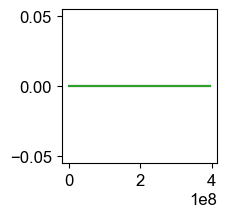

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f90d94ebef0>

In [64]:
#power_list = [0.01:0.025:2;]*1e4;
plot(power_list.^2, photons_out[:,1])
plot(power_list.^2, photons_out[:,2])
plot(power_list.^2, photons_out[:,1]+photons_out[:,2])

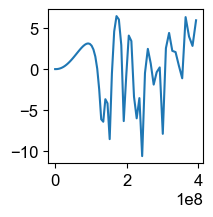

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9098adfe80>

In [70]:
plot(power_list.^2, squeezing_sing[:,1])

## Usage example 2: same as above for a double Sagnac

In [66]:
sim_fbs = sim(3,2^8,z_grid);

power_list = [0.01:0.025:2;]*1e4;

photons_in = zeros(length(power_list));
photons_out = zeros(length(power_list),sim_fbs.num_modes);
photons_fluc = 1.0im*zeros(length(power_list),sim_fbs.num_modes);

V_vac = vacuum_V(sim_fbs);

bs1 = beamsplitter([1,2],sqrt(0.1));
fiber1 = fiber(1,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
fiber2 = fiber(2,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
bs2 = beamsplitter([1,2],sqrt(0.1));

bs3 = beamsplitter([1,3],sqrt(0.1));
fiber3 = fiber(1,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
fiber4 = fiber(3,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
bs4 = beamsplitter([1,3],sqrt(0.1));

components = [bs1 fiber1 fiber2 bs2 bs3 fiber3 fiber4 bs4];

for ii=1:length(power_list)
    
    # Initializing the mean fields of the initial state
    center_amplitude = power_list[ii];
    state_sagnac = state(1.0im*zeros((sim_fbs.num_modes)*(sim_fbs.N_z)),V_vac);
    range_mode1 = get_row_index(1,fiber1.fiber_mode):get_row_index(N_z,fiber1.fiber_mode);
    state_sagnac.mean_fields[range_mode1] .= center_amplitude * sech.(sim_fbs.z_grid/L_pulse);
    photons_in[ii] = sum(abs2.(get_meanfield_i(state_sagnac,1)));
    
    # Solving for mean-field and fluctuation dynamics
    prop_system(components,state_sagnac,sim_fbs,t_grid)
    
    for ss=1:sim_fbs.num_modes
        photons_out[ii,ss] = sum(abs2.(get_meanfield_i(state_sagnac,ss)));
        photons_fluc[ii,ss] = n2_exp(state_sagnac,ss,sim_fbs);
    end
    
end

In [67]:
squeezing_dbl = 10log10.(photons_fluc ./ photons_out);

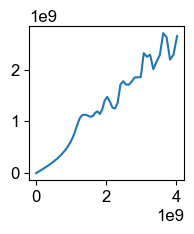

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f910a0564a8>

In [68]:
plot(photons_in,photons_out[:,1])

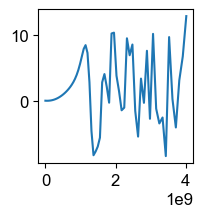

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f910a137710>

In [69]:
plot(photons_in, squeezing_dbl[:,1])

## Usage example 3: same as above but for a triple sagnac

In [ ]:
sim_fbs = sim(4,2^8,z_grid);

power_list = [0.01:0.025:2;]*1e4;

photons_in = zeros(length(power_list));
photons_out = zeros(length(power_list),sim_fbs.num_modes);
photons_fluc = 1.0im*zeros(length(power_list),sim_fbs.num_modes);

V_vac = vacuum_V(sim_fbs);

bs1 = beamsplitter([1,2],sqrt(0.1));
fiber1 = fiber(1,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
fiber2 = fiber(2,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
bs2 = beamsplitter([1,2],sqrt(0.1));

bs3 = beamsplitter([1,3],sqrt(0.1));
fiber3 = fiber(1,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
fiber4 = fiber(3,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
bs4 = beamsplitter([1,3],sqrt(0.1));

bs5 = beamsplitter([1,4],sqrt(0.1));
fiber5 = fiber(1,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
fiber6 = fiber(4,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
bs6 = beamsplitter([1,4],sqrt(0.1));

components = [bs1 fiber1 fiber2 bs2 bs3 fiber3 fiber4 bs4 bs5 fiber5 fiber6 bs6];

for ii=1:length(power_list)
    
    # Initializing the mean fields of the initial state
    center_amplitude = power_list[ii];
    state_sagnac = state(1.0im*zeros((sim_fbs.num_modes)*(sim_fbs.N_z)),V_vac);
    range_mode1 = get_row_index(1,fiber1.fiber_mode):get_row_index(N_z,fiber1.fiber_mode);
    state_sagnac.mean_fields[range_mode1] .= center_amplitude * sech.(sim_fbs.z_grid/L_pulse);
    photons_in[ii] = sum(abs2.(get_meanfield_i(state_sagnac,1)));
    
    # Solving for mean-field and fluctuation dynamics
    prop_system(components,state_sagnac,sim_fbs,t_grid)
    
    for ss=1:sim_fbs.num_modes
        photons_out[ii,ss] = sum(abs2.(get_meanfield_i(state_sagnac,ss)));
        photons_fluc[ii,ss] = n2_exp(state_sagnac,ss,sim_fbs);
    end
    
end

In [ ]:
squeezing_trp = 10log10.(photons_fluc ./ photons_out);

In [ ]:
plot(photons_in,photons_out[:,1])

In [ ]:
plot(photons_in, squeezing_trp[:,1])

## Usage example 4: mean-field transfer curves only for single, double, and triple Sagnac

Single interferometer

In [15]:
λ_center = 1560e-9;
ω_center = 2*pi*c_light / λ_center;
fiber_index = 1.47;
v_group = c_light / fiber_index;
fiber_dispersion = 1*22e3 * 1e-30 * v_group^3; # in m^2/s
γ_fiber = 1.8*1e-3; # in 1/W/m.
fiber_nonlinearity = ħ*(ω_center)*(v_group^2)*(γ_fiber);
L_fiber = 10; # in meters
T_fiber = L_fiber / v_group;

# Pulse parameters - pulse time only makes sense for single-parameter pulses like sech / gaussian
t_pulse = 100e-15; # in seconds
L_pulse = v_group * t_pulse;

L_sim = 50*L_pulse;
N_z = 2^8;
z_grid = collect(range(-L_sim/2,L_sim/2,length=N_z));

N_t = 100;
dt = T_fiber / N_t;
t_grid = collect(range(0,T_fiber,length=N_t));

In [16]:
sim_fbs = sim(2,2^8,z_grid);

power_list = [0.01:0.01:2;]*1e4;

photons_in = zeros(length(power_list));
photons_out_1 = zeros(length(power_list));
photons_out_2 = zeros(length(power_list));

V_vac = vacuum_V(sim_fbs);

BS1 = beamsplitter([1,2],sqrt(0.1));
fiber1 = fiber(1,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
fiber2 = fiber(2,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
BS2 = beamsplitter([1,2],sqrt(0.1));

components = [BS1 fiber1 fiber2 BS2];

for ii=1:length(power_list)
    
    # Initializing the mean fields of the initial state
    center_amplitude = power_list[ii];
    state_sagnac = state(1.0im*zeros((sim_fbs.num_modes)*(sim_fbs.N_z)),V_vac);
    range_mode1 = get_row_index(1,fiber1.fiber_mode):get_row_index(N_z,fiber1.fiber_mode);
    state_sagnac.mean_fields[range_mode1] .= center_amplitude * sech.(sim_fbs.z_grid/L_pulse);
    photons_in[ii] = sum(abs2.(get_meanfield_i(state_sagnac,1)));
    prop_system_mean(components,state_sagnac,sim_fbs,t_grid)

    photons_out_1[ii] = sum(abs2.(get_meanfield_i(state_sagnac,1)));
    photons_out_2[ii] = sum(abs2.(get_meanfield_i(state_sagnac,2)));
    
end

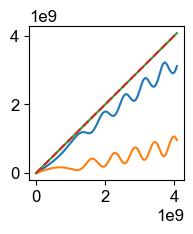

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f90aaedf3c8>

In [17]:
plot(photons_in,photons_out_1)
plot(photons_in,photons_out_2)
plot(photons_in,photons_out_1+photons_out_2)
plot(photons_in,photons_in,"--")

Double interferometer

In [18]:
sim_fbs = sim(3,2^8,z_grid);

power_list = [0.01:0.01:2;]*1e4;

photons_in = zeros(length(power_list));
photons_out_1 = zeros(length(power_list));
photons_out_2 = zeros(length(power_list));
photons_out_3 = zeros(length(power_list));

V_vac = vacuum_V(sim_fbs);

bs1 = beamsplitter([1,2],sqrt(0.09));
fiber1 = fiber(1,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
fiber2 = fiber(2,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
bs2 = beamsplitter([1,2],sqrt(0.09));

bs3 = beamsplitter([1,3],sqrt(0.01));
fiber3 = fiber(1,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
fiber4 = fiber(3,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
bs4 = beamsplitter([1,3],sqrt(0.01));

components = [bs1 fiber1 fiber2 bs2 bs3 fiber3 fiber4 bs4];

for ii=1:length(power_list)
    
    # Initializing the mean fields of the initial state
    center_amplitude = power_list[ii];
    state_sagnac = state(1.0im*zeros((sim_fbs.num_modes)*(sim_fbs.N_z)),V_vac);
    range_mode1 = get_row_index(1,fiber1.fiber_mode):get_row_index(N_z,fiber1.fiber_mode);
    state_sagnac.mean_fields[range_mode1] .= center_amplitude * sech.(sim_fbs.z_grid/L_pulse);
    photons_in[ii] = sum(abs2.(get_meanfield_i(state_sagnac,1)));
    
    prop_system_mean(components,state_sagnac,sim_fbs,t_grid)

    photons_out_1[ii] = sum(abs2.(get_meanfield_i(state_sagnac,1)));
    photons_out_2[ii] = sum(abs2.(get_meanfield_i(state_sagnac,2)));
    photons_out_3[ii] = sum(abs2.(get_meanfield_i(state_sagnac,3)));
    
end

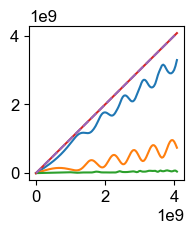

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f908aaff2b0>

In [19]:
plot(photons_in,photons_out_1)
plot(photons_in,photons_out_2)
plot(photons_in,photons_out_3)
plot(photons_in,photons_out_1+photons_out_2+photons_out_3)
plot(photons_in,photons_in,"--")

Triple interferometer

In [20]:
λ_center = 1560e-9;
ω_center = 2*pi*c_light / λ_center;
fiber_index = 1.47;
v_group = c_light / fiber_index;
fiber_dispersion = 1*22e3 * 1e-30 * v_group^3; # in m^2/s
γ_fiber = 1.8*1e-3; # in 1/W/m.
fiber_nonlinearity = ħ*(ω_center)*(v_group^2)*(γ_fiber);
L_fiber = 10; # in meters
T_fiber = L_fiber / v_group;

# Pulse parameters - pulse time only makes sense for single-parameter pulses like sech / gaussian
t_pulse = 100e-15; # in seconds
L_pulse = v_group * t_pulse;

L_sim = 50*L_pulse;
N_z = 2^8;
z_grid = collect(range(-L_sim/2,L_sim/2,length=N_z));

In [21]:
sim_fbs = sim(4,2^8,z_grid);

power_list = [0.01:0.01:2;]*1e4;

photons_in = zeros(length(power_list));
photons_out_1 = zeros(length(power_list));
photons_out_2 = zeros(length(power_list));
photons_out_3 = zeros(length(power_list));
photons_out_4 = zeros(length(power_list));

V_vac = vacuum_V(sim_fbs);

bs1 = beamsplitter([1,2],sqrt(0.08));
fiber1 = fiber(1,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
fiber2 = fiber(2,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
bs2 = beamsplitter([1,2],sqrt(0.08));

bs3 = beamsplitter([1,3],sqrt(0.01));
fiber3 = fiber(1,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
fiber4 = fiber(3,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
bs4 = beamsplitter([1,3],sqrt(0.01));

bs5 = beamsplitter([1,4],sqrt(0.01));
fiber5 = fiber(1,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
fiber6 = fiber(4,fiber_index,L_fiber,fiber_dispersion,fiber_nonlinearity);
bs6 = beamsplitter([1,4],sqrt(0.01));

components = [bs1 fiber1 fiber2 bs2 bs3 fiber3 fiber4 bs4 bs5 fiber5 fiber6 bs6];

for ii=1:length(power_list)
    
    # Initializing the mean fields of the initial state
    center_amplitude = power_list[ii];
    state_sagnac = state(1.0im*zeros((sim_fbs.num_modes)*(sim_fbs.N_z)),V_vac);
    range_mode1 = get_row_index(1,fiber1.fiber_mode):get_row_index(N_z,fiber1.fiber_mode);
    state_sagnac.mean_fields[range_mode1] .= center_amplitude * sech.(sim_fbs.z_grid/L_pulse);
    photons_in[ii] = sum(abs2.(get_meanfield_i(state_sagnac,1)));
    
    prop_system_mean(components,state_sagnac,sim_fbs,t_grid)

    photons_out_1[ii] = sum(abs2.(get_meanfield_i(state_sagnac,1)));
    photons_out_2[ii] = sum(abs2.(get_meanfield_i(state_sagnac,2)));
    photons_out_3[ii] = sum(abs2.(get_meanfield_i(state_sagnac,3)));
    photons_out_4[ii] = sum(abs2.(get_meanfield_i(state_sagnac,4)));
    
end

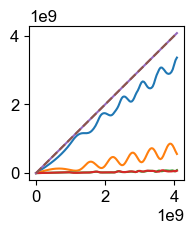

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9098abe630>

In [22]:
plot(photons_in,photons_out_1)
plot(photons_in,photons_out_2)
plot(photons_in,photons_out_3)
plot(photons_in,photons_out_4)
plot(photons_in,photons_out_1+photons_out_2+photons_out_3+photons_out_4)
plot(photons_in,photons_in,"--")